# Компьютерное зрение

# Работа с изображениями

## Полносвязная сеть
<img src="/home/cyberpsychoz/NSU_studying-IIR/2_course/PAC/images/LessonsII/mnist_fc.png" width=60% height=60%>
Количество весов первого слоя = высота * ширина * каналы * количество нейронов скрытого слоя

## Сверточная нейронная сеть

![Архитектура](https://upload.wikimedia.org/wikipedia/commons/5/55/%D0%90%D1%80%D1%85%D0%B8%D1%82%D0%B5%D0%BA%D1%82%D1%83%D1%80%D0%B0_%D1%81%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D0%BE%D0%B9_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D0%BE%D0%B9_%D1%81%D0%B5%D1%82%D0%B8.png)



## Свёртка
Свертка (англ. convolution) — это операция, показывающая «схожесть» одной функции с отражённой и сдвинутой копией другой. Понятие свёртки обобщается для функций, определённых на группах, а также мер. 

<img src="/home/cyberpsychoz/NSU_studying-IIR/2_course/PAC/images/LessonsII/convolution.jpeg" alt="Conv" height=40% width=40%>

$$O_{i, j} = f(K*I_{i-s:i+s, j-s:j+s})$$

$K$ - ядро свёртки  
$I$ - входной тезнор  
$I_{i-s:i+s, j-s:j+s}$ - срез тензора размера ядра свёртки с центром в точке (i, j)  
$O_{i, j}$ - результат свёртки (значение выходного тензора в точке (i, j))  
$f$ - функция активации

Слой свёртки (convolutional layer) — это основной блок свёрточной нейронной сети. Слой свёртки включает в себя для каждого канала свой фильтр, ядро свёртки которого обрабатывает предыдущий слой по фрагментам (суммируя результаты поэлементного произведения для каждого фрагмента). Весовые коэффициенты ядра свёртки (небольшой матрицы) неизвестны и устанавливаются в процессе обучения.

![Свёртка](https://neurohive.io/wp-content/uploads/2018/07/2d-covolutions.gif)

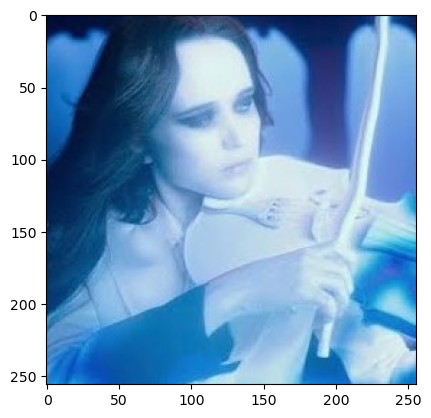

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread('/home/cyberpsychoz/NSU_studying-IIR/2_course/PAC/data/Vanya.jpg')[..., ::-1]
plt.imshow(image)
plt.show()

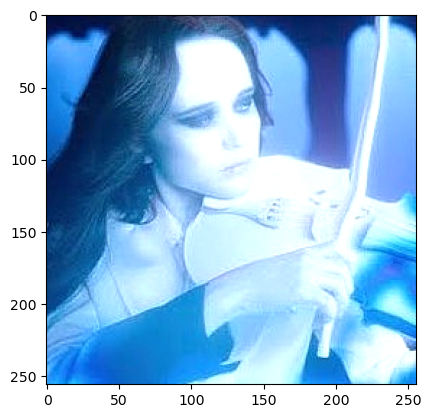

In [3]:
# увеличение чёткости
kernel = np.array([
    [-0.1, -0.1, -0.1],
    [-0.1,    2, -0.1],
    [-0.1, -0.1, -0.1],
])
img_out = cv2.filter2D(image, -1, kernel)
plt.imshow(img_out)
plt.show()

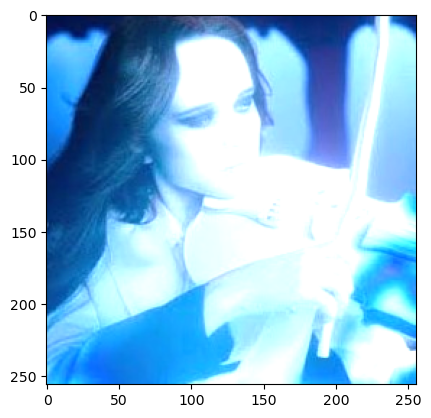

In [4]:
# увеличение яркости
kernel = np.array([
    [-0.1,  0.2, -0.1],
    [ 0.2,    1,  0.2],
    [-0.1,  0.2, -0.1],
])
img_out = cv2.filter2D(image, -1, kernel)
plt.imshow(img_out)
plt.show()

### Ядра нейронной сети
<img src="/home/cyberpsychoz/NSU_studying-IIR/2_course/PAC/images/LessonsII/kernels.jpeg" width=60% height=60%>
Каждый из 96 фильтров, показанных здесь, имеет размер 11x11x3

### CNN Explainer
#### https://poloclub.github.io/cnn-explainer/
#### https://adamharley.com/nn_vis/

# Свёрточный слой
<img src="/home/cyberpsychoz/NSU_studying-IIR/2_course/PAC/images/LessonsII/conv1.png" width=60% height=60%>

## Max Pooling
<img src="/home/cyberpsychoz/NSU_studying-IIR/2_course/PAC/images/LessonsII/maxpool.jpeg" width=60% height=60%>

## Свёрточная сеть
<img src="/home/cyberpsychoz/NSU_studying-IIR/2_course/1 sem/PAC/images/LessonsII/convnet.jpeg" width=80% height=80%>
Карты активации примера архитектуры ConvNet. Первоначальные данные представляют собой необработанные пиксели изображения (слева), а последний выход хранит оценки классов (справа).

In [2]:
# Огромное количество слоев, огромное число ядер свёртки, будет ли работать быстро?
# Если расчитывать результат свёртки в цикле, то нет

### im2col:
<img src="/home/cyberpsychoz/NSU_studying-IIR/2_course/1 sem/PAC/images/LessonsII/im2col.png" width=60% height=60%>

<img src="/home/cyberpsychoz/NSU_studying-IIR/2_course/1 sem/PAC/images/LessonsII/im2col_2.png" width=60% height=60%>

### Padding
<img src="/home/cyberpsychoz/NSU_studying-IIR/2_course/1 sem/PAC/images/LessonsII/pad.png" width=60% height=60%>

### Stride
<img src="/home/cyberpsychoz/NSU_studying-IIR/2_course/1 sem/PAC/images/LessonsII/stride.png" width=60% height=60%>
Шаг (stride) 3 и 2 по высоте и ширине соответственно.

## Задания

1. Написать функцию, переводящую изображение в матрицу столбцов - im2col(). На вход функция принимает изображение и размер свёртки, возвращает столбцы.
2. Написать функцию свёртки, которая работает без циклов. Вместо циклов, она использует im2col(), для перевода изображения в набор столбцов.
3. Сравнить результаты с torch.nn.Conv2d 


In [19]:
import torch
import torch.nn as nn
from PIL import Image
import numpy as np


def im2col(images, kernel_size, stride=1, padding=0):
    if isinstance(kernel_size, int):
        kernel_h = kernel_w = kernel_size
    else:
        kernel_h, kernel_w = kernel_size
    
    batch, channels, height, width = images.shape
    
    if padding > 0:
        images = nn.functional.pad(images, (padding, padding, padding, padding))
        height += 2 * padding
        width += 2 * padding
    
    col = torch.nn.functional.unfold(
        images,
        kernel_size=(kernel_h, kernel_w),
        stride=stride
    )
    
    return col

In [22]:

def conv2d_im2col(images, weights, bias=None, stride=1, padding=0):
    batch, in_channels, height, width = images.shape
    out_channels, _, kernel_h, kernel_w = weights.shape
    
    
    col = im2col(images, kernel_size=(kernel_h, kernel_w), stride=stride, padding=padding)
    
    weight_matrix = weights.view(out_channels, -1)
        
    output = torch.matmul(weight_matrix.unsqueeze(0), col)
    
    if bias is not None:
        output = output + bias.view(1, -1, 1)
    
    out_h = (height + 2 * padding - kernel_h) // stride + 1
    out_w = (width + 2 * padding - kernel_w) // stride + 1
    
    output = output.view(batch, out_channels, out_h, out_w)
    
    return output

In [10]:
def test_im2col_vs_pytorch():
    batch_size = 2
    in_channels = 3
    out_channels = 16
    height, width = 32, 32
    kernel_size = 3
    stride = 1
    padding = 1
    
    image = torch.randn(batch_size, in_channels, height, width)
    
    weights = torch.randn(out_channels, in_channels, kernel_size, kernel_size)
    bias = torch.randn(out_channels)
    
    output_im2col = conv2d_im2col(image, weights, bias, stride=stride, padding=padding)
    
    conv_pytorch = nn.Conv2d(in_channels, out_channels, kernel_size, 
                             stride=stride, padding=padding, bias=True)
    conv_pytorch.weight.data = weights
    conv_pytorch.bias.data = bias
    output_pytorch = conv_pytorch(image)
    
    
    diff = torch.abs(output_im2col - output_pytorch).max().item()
    mse = torch.mean((output_im2col - output_pytorch) ** 2).item()
    
    print(f"Форма выхода: {output_im2col.shape}")
    print(f"Максимальная разница: {diff:.2e}")
    print(f"MSE ошибка: {mse:.2e}")
    print(f"Результаты совпадают: {torch.allclose(output_im2col, output_pytorch, atol=1e-5)}")
    
    return output_im2col, output_pytorch, diff

In [23]:

def sobel_kernel():

    sobel_x = torch.tensor([[-1, 0, 1],
                            [-2, 0, 2],
                            [-1, 0, 1]], dtype=torch.float32).view(1, 1, 3, 3)
    
  
    sobel_y = torch.tensor([[-1, -2, -1],
                            [ 0,  0,  0],
                            [ 1,  2,  1]], dtype=torch.float32).view(1, 1, 3, 3)
    
    return sobel_x, sobel_y

def load_image(path):
    img = Image.open(path).convert('L')

    img_arr = np.array(img) / 255.0
    img_tensor = torch.from_numpy(img_arr).float().unsqueeze(0).unsqueeze(0)
    return img_tensor

In [24]:
def sobek(path):
    image = load_image(path)
    sobel_x, sobel_y = sobel_kernel()

    # im2col
    gx_im2col = conv2d_im2col(image, sobel_x, padding=1)
    gy_im2col = conv2d_im2col(image, sobel_y, padding=1)
    magamed = torch.sqrt(gx_im2col**2 + gy_im2col**2)

    # torchik
    conv_sobel_x = nn.Conv2d(1, 1, 3, padding=1, bias=False)
    conv_sobel_x.weight.data = sobel_x
    gx_pytorch = conv_sobel_x(image)
    
    conv_sobel_y = nn.Conv2d(1, 1, 3, padding=1, bias=False)
    conv_sobel_y.weight.data = sobel_y
    gy_pytorch = conv_sobel_y(image)

    magamed2 = torch.sqrt(gx_pytorch**2 + gy_pytorch**2)

    diff_gx = torch.abs(gx_im2col - gx_pytorch).max().item()
    diff_gy = torch.abs(gy_im2col - gy_pytorch).max().item()
    diff_mag = torch.abs(magamed - magamed2).max().item()
    
    print(f"Gx max diff: {diff_gx:.2e}")
    print(f"Gy max diff: {diff_gy:.2e}")
    print(f"Magnitude max diff: {diff_mag:.2e}")
    print(f"Совпадение: {torch.allclose(magamed, magamed2, atol=1e-5)}")

    
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    

    axes[0,0].imshow(image[0,0], cmap='gray')
    axes[0,0].set_title('Исходное')
    axes[0,0].axis('off')
    
    
    axes[0,1].imshow(gx_im2col[0,0].detach(), cmap='gray')
    axes[0,1].set_title('Gx (im2col)')
    axes[0,2].imshow(gy_im2col[0,0].detach(), cmap='gray') 
    axes[0,2].set_title('Gy (im2col)')
    axes[0,3].imshow(magamed[0,0].detach(), cmap='gray')
    axes[0,3].set_title('Magnitude (im2col)')
    
    
    axes[1,1].imshow(gx_pytorch[0,0].detach(), cmap='gray')
    axes[1,1].set_title('Gx (PyTorch)')
    axes[1,2].imshow(gy_pytorch[0,0].detach(), cmap='gray')
    axes[1,2].set_title('Gy (PyTorch)')
    axes[1,3].imshow(magamed2[0,0].detach(), cmap='gray')
    axes[1,3].set_title('Magnitude (PyTorch)')
    
    
    axes[1,0].imshow(torch.abs(gx_im2col - gx_pytorch)[0,0].detach(), cmap='hot')
    axes[1,0].set_title(f'Разность Gx')
    axes[1,0].axis('off')
    
    plt.tight_layout()
    plt.show()

    return magamed, magamed2

Gx max diff: 0.00e+00
Gy max diff: 0.00e+00
Magnitude max diff: 0.00e+00
Совпадение: True


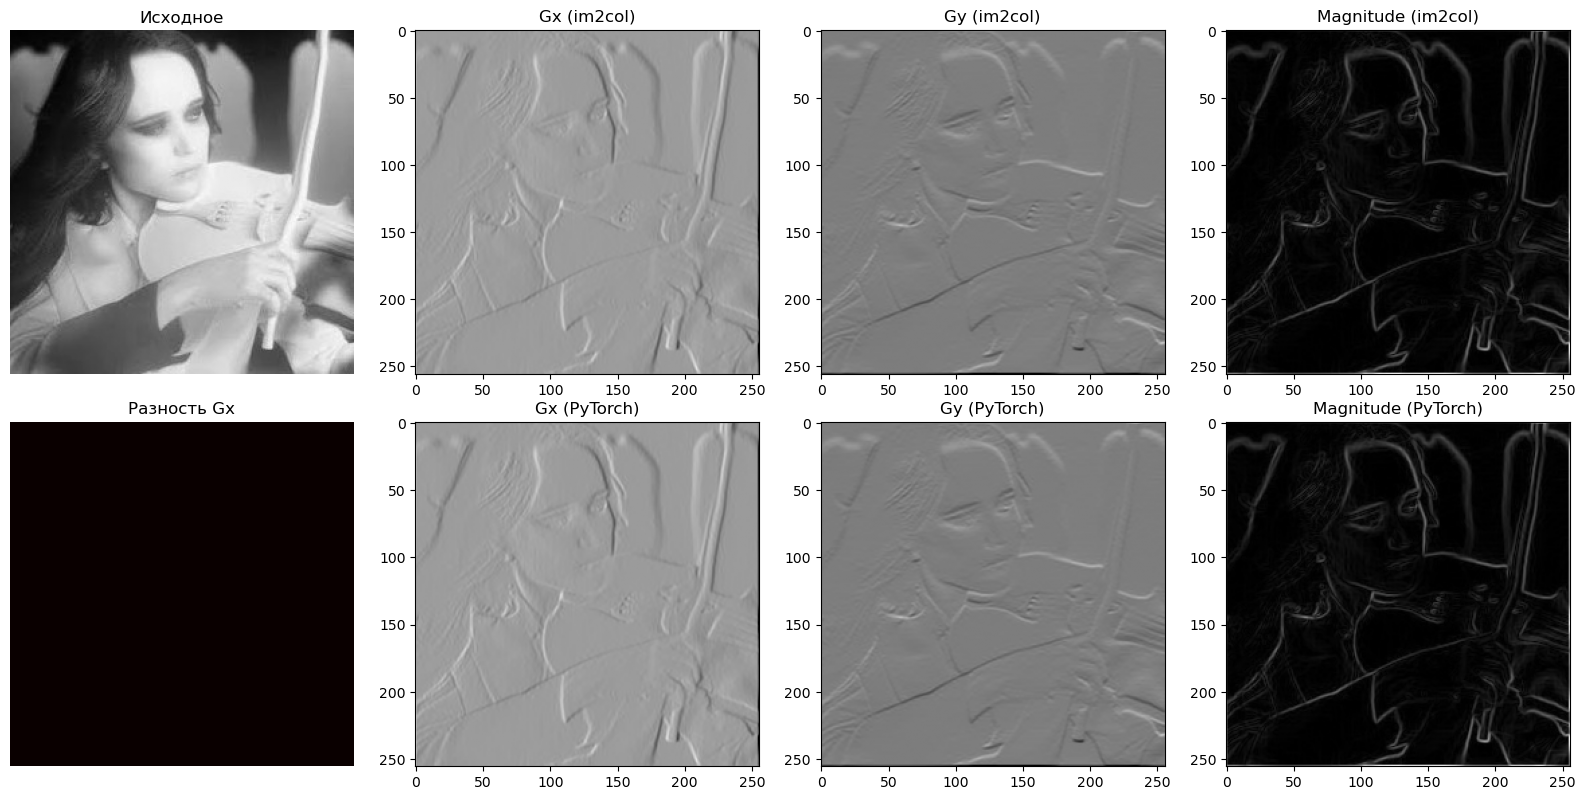

In [25]:
maga1, maga2 = sobek('/home/cyberpsychoz/NSU_studying-IIR/2_course/1 sem/PAC/data/Vanya.jpg')

    

## Лабораторная работа 14.
0. Принимается только после демонстрации функции im2col() из задания выше.
1. Задача классификации изображений (https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html?highlight=mnist). Повторить тренировку модели (train) и запустить классификацию изображений (inference).
2. Получить максимальную точность классификации (минимальный loss) путём изменения модели, например, добавлением скрытых слоёв.
3. По возможности обучить на GPU.

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print(device)

cuda:0


In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5, 0.5), (0.5,0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

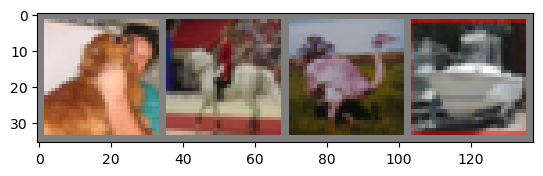

dog   horse bird  ship 


In [26]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

формул

In [8]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = torch.flatten(x, 1) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()
net.to(device)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1024, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

H_out = floor((H_in + 2*padding - kernel_size) / stride + 1)


In [27]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001) 

g_t = ∂Loss/∂θ
m_t = β1 * m_{t-1} + (1-β1) * g_t    
v_t = β2 * v_{t-1} + (1-β2) * g_t² 

m_hat = m_t / (1 - β1^t)
v_hat = v_t / (1 - β2^t)

θ = θ - lr * m_hat / (√v_hat + ε)

In [32]:
for epoch in range(10):  

    optimizer.zero_grad()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:    
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Негр в пене')

PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

[1,  2000] loss: 0.308
[1,  4000] loss: 0.310
[1,  6000] loss: 0.330
[1,  8000] loss: 0.313
[1, 10000] loss: 0.326
[1, 12000] loss: 0.318
[2,  2000] loss: 0.334
[2,  4000] loss: 0.312
[2,  6000] loss: 0.306
[2,  8000] loss: 0.325
[2, 10000] loss: 0.302
[2, 12000] loss: 0.316
[3,  2000] loss: 0.328
[3,  4000] loss: 0.320
[3,  6000] loss: 0.295
[3,  8000] loss: 0.317
[3, 10000] loss: 0.324
[3, 12000] loss: 0.306
[4,  2000] loss: 0.324
[4,  4000] loss: 0.293
[4,  6000] loss: 0.324
[4,  8000] loss: 0.328
[4, 10000] loss: 0.304
[4, 12000] loss: 0.319
[5,  2000] loss: 0.323
[5,  4000] loss: 0.294
[5,  6000] loss: 0.324
[5,  8000] loss: 0.328
[5, 10000] loss: 0.325
[5, 12000] loss: 0.307
[6,  2000] loss: 0.319
[6,  4000] loss: 0.322
[6,  6000] loss: 0.308
[6,  8000] loss: 0.319
[6, 10000] loss: 0.322
[6, 12000] loss: 0.310
[7,  2000] loss: 0.305
[7,  4000] loss: 0.322
[7,  6000] loss: 0.314
[7,  8000] loss: 0.312
[7, 10000] loss: 0.321
[7, 12000] loss: 0.325
[8,  2000] loss: 0.314
[8,  4000] 

In [33]:
net = Net()
net.to(device)
net.load_state_dict(torch.load(PATH, weights_only=True))
images = images.to(device)
output = net(images)

In [34]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   bird  horse cat  


In [35]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}


with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1



for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 79.1 %
Accuracy for class: car   is 79.6 %
Accuracy for class: bird  is 53.9 %
Accuracy for class: cat   is 58.0 %
Accuracy for class: deer  is 65.0 %
Accuracy for class: dog   is 60.6 %
Accuracy for class: frog  is 74.0 %
Accuracy for class: horse is 82.4 %
Accuracy for class: ship  is 82.5 %
Accuracy for class: truck is 81.1 %


применить фильтр собеля к изображению

Accuracy for class: plane is 73.2 %
Accuracy for class: car   is 85.1 %
Accuracy for class: bird  is 57.3 %
Accuracy for class: cat   is 57.3 %
Accuracy for class: deer  is 74.0 %
Accuracy for class: dog   is 60.1 %
Accuracy for class: frog  is 80.3 %
Accuracy for class: horse is 72.9 %
Accuracy for class: ship  is 84.6 %
Accuracy for class: truck is 80.8 %